In [18]:
import gym
import minihack
import numpy as np
import math
import matplotlib.pyplot as plt
import IPython.display as display
from typing import Tuple, List
from utils import *
from algorithms import *
from logic import *

In [19]:
#env = gym.make("MiniHack-River-Lava-v0", observation_keys=("chars", "pixel", "colors"))
env = gym.make("MiniHack-River-Narrow-v0", observation_keys=("chars", "pixel", "colors"))
state = env.reset()

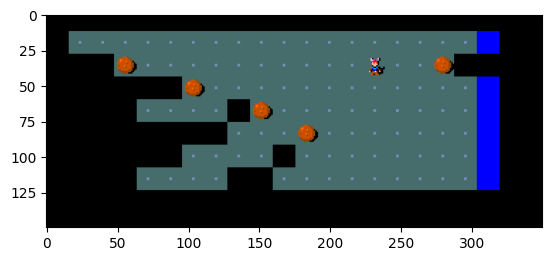

In [20]:
plt.imshow(state['pixel'][100:250, 400:750]) # Immagine ristretta con range [y][x]

River target finale:  (8, 44)
RIVER:  125 125


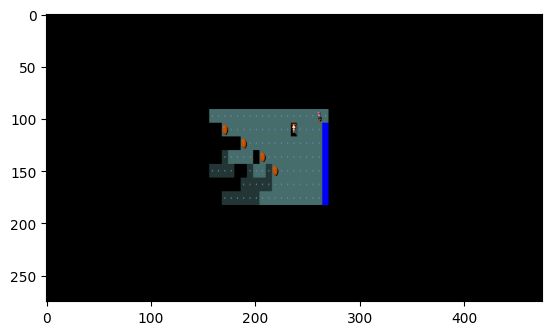

In [21]:
# get state
game_map = state['chars']
print("PLAYER:", get_player_location(game_map))
river_target, observation = push_one_boulder_into_river(state, env)
print("River target finale: ", river_target)
print("RIVER: ", game_map[river_target], ord("}"))
#while game_map[river_target[0], river_target[1]] == ord("}"): # exit only when the boulder creates a passage#
    #river_target, observation = push_one_boulder_into_river(state, env)

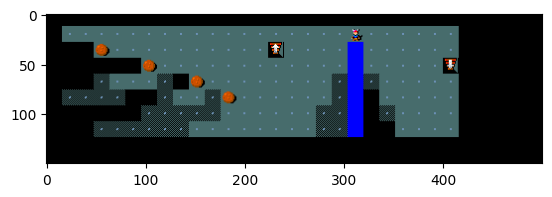

In [22]:
action, _ = action_map(get_player_location(game_map), river_target)
state,_,_,_ = env.step(action)
plt.imshow(state['pixel'][100:250, 400:900]) # Immagine ristretta con range [y][x]

In [23]:
game_map = state['chars']
game_gui = state['pixel']

player_pos = get_player_location(game_map)
exit_pos = get_exit_location(game_map)

In [24]:
print(player_pos)
print(exit_pos)

(7, 44)
(9, 50)


Rewards: 
0.0
0.0
0.0
0.0
0.0
1.0
Total reward:  1.0


[(7, 45), (7, 46), (7, 47), (7, 48), (8, 49)]

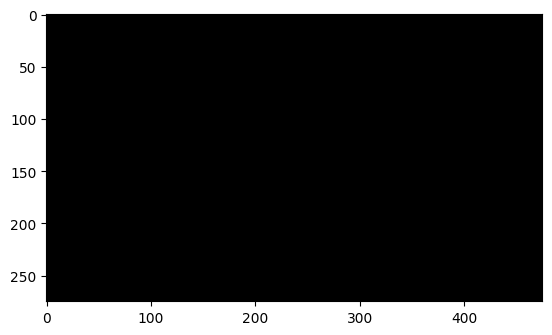

In [25]:
path_to_exit = a_star(game_map, player_pos, exit_pos, False, False, get_optimal_distance_point_to_point)
print(path_to_exit)
actions_to_exit,names = actions_from_path(player_pos, path_to_exit[1:])
print(actions_to_exit)
plot_animated_sequence(env, game_gui, game_map, actions_to_exit)

In [26]:
rl = get_river_locations(game_map, state["colors"])
rl

[]